In [1]:
import pandas as pd
from src.graph_builder import GraphePERT
from src.pert_calculator import CalculateurPERT

from src.visualisation import VisualisateurPERT

## Chargement et Analyse

In [2]:
graphe = GraphePERT('../data/taches.csv')
graphe.afficher_resume()

print("---")
calc = CalculateurPERT(graphe)
resultats = calc.executer_analyse_complete()
calc.afficher_resume()

Nombre de taches: 9
Nombre d'arcs: 12

Taches initiales: A
Taches finales: I

Validation: Graphe Valide
---
Duree totale du projet: 64 minutes
Chemin critique: A -> B -> F -> H -> I
Nombre de taches critiques: 5

Taches non-critiques (avec marge):
  C (Compile Frontend): 5 minutes de marge
  D (Unit Tests Back): 4 minutes de marge
  E (Unit Tests Front): 12 minutes de marge
  G (Security Scan (SAST)): 32 minutes de marge


## Tableau des Resultats

In [3]:
tableau = calc.generer_tableau_resultats()
df = pd.DataFrame(tableau)
print(df)

df.to_csv('../rapport/resultats_pert.csv', index=False)

  Code                   Nom  Duree  ES  EF  LS  LF  Marge Critique
0    A          Git Checkout      2   0   2   0   2      0      Oui
1    B       Compile Backend     15   2  17   2  17      0      Oui
2    C      Compile Frontend     10   2  12   7  17      5      Non
3    G  Security Scan (SAST)     20   2  22  34  54     32      Non
4    D       Unit Tests Back      8  17  25  21  29      4      Non
5    E      Unit Tests Front      5  12  17  24  29     12      Non
6    F    Build Docker Image     12  17  29  17  29      0      Oui
7    H     Integration Tests     25  29  54  29  54      0      Oui
8    I        Deploy to Prod     10  54  64  54  64      0      Oui


## Graphe PERT

In [4]:
visu = VisualisateurPERT(calc)

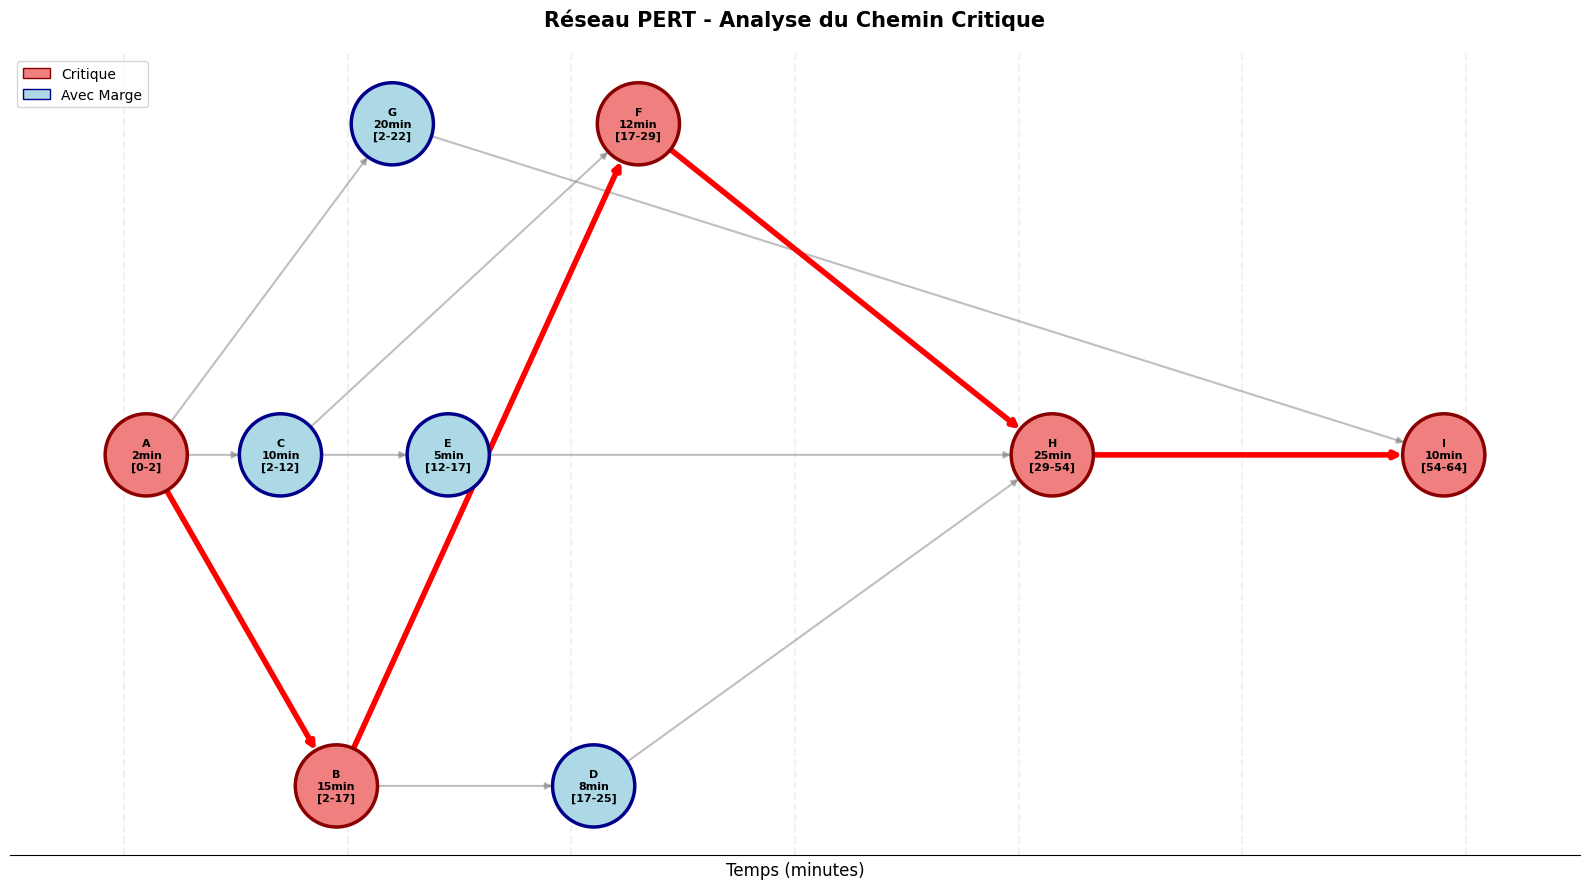

In [6]:
visu.dessiner_pert()

## Diagramme de Gantt

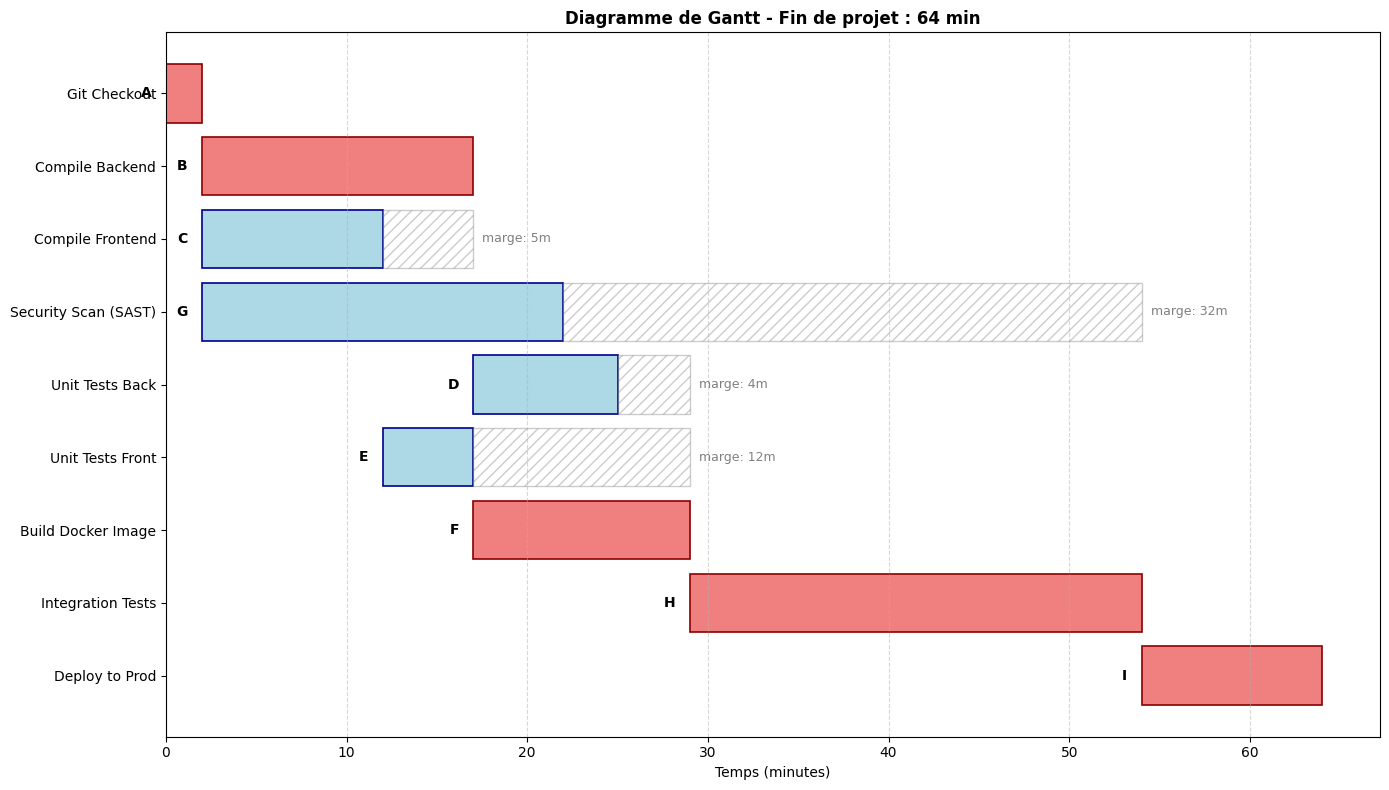

In [8]:
visu.dessiner_gantt()